In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

library(mclust)

Warning message:
“no DISPLAY variable so Tk is not available”
Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [32]:
source('lcic.r')

In [10]:
original_data <- read.csv('Data/wdbc.data', header=FALSE)
original_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [14]:
n_examples = nrow(original_data)

In [60]:
# Pre-process and extract variables as per Samworth
# "the standard errors of the first two measurements"
# X = stderr(radius) {V13 above}, Y = stderr(texture) {V14 above}

predictors_mat <- matrix(0, nrow=n_examples, ncol=2)
predictors_mat[,1] <- original_data[,13]
predictors_mat[,2] <- original_data[,14]

targets_mat <- (original_data[,2]=='M')*1



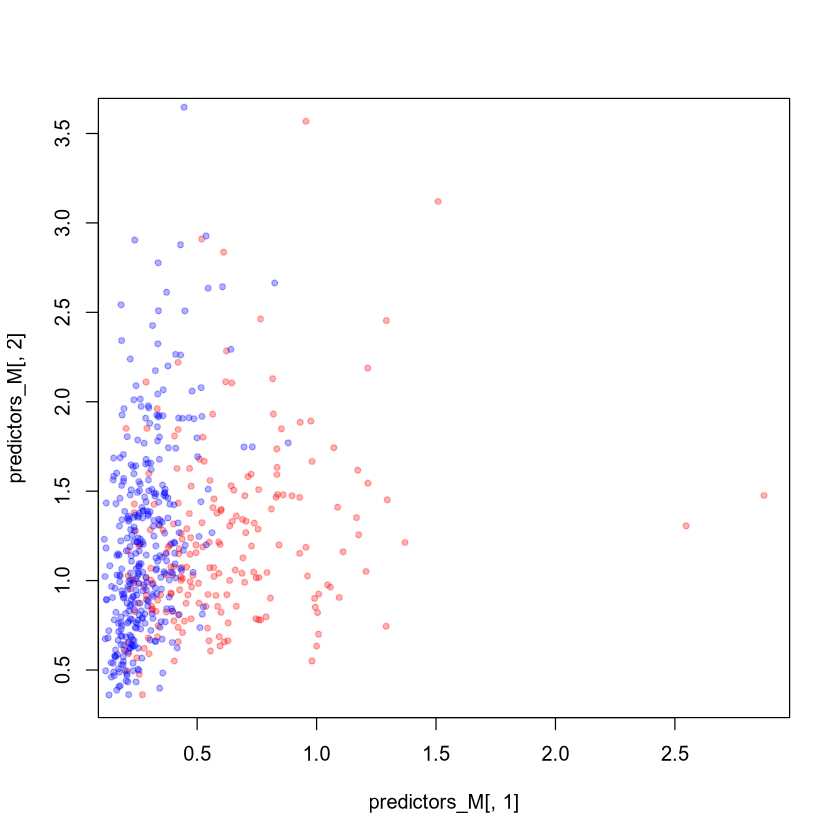

In [61]:
predictors_M = predictors_mat[targets_mat==1,]
predictors_B = predictors_mat[targets_mat==0,]

plot(x=predictors_M[,1], y=predictors_M[,2], pch=20, col=rgb(1,0,0,0.3))
points(x=predictors_B[,1], y=predictors_B[,2], pch=20, col=rgb(0,0,1,0.3))

In [62]:
RealData <- package_real_data(predictors_mat)
RealData

1.0950,0.9053
0.5435,0.7339
0.7456,0.7869
0.4956,1.1560
0.7572,0.7813
0.3345,0.8902
0.4467,0.7732
0.5835,1.3770
0.3063,1.0020
0.2976,1.5990
0.3795,1.1870


In [127]:
num_clusters <- 2
theta_mat_init_hc <- initialize_EM(RealData, num_clusters)
size(theta_mat_init_hc)


[1] 569   2

In [135]:
num_clusters <- 2
theta_mat_init <- matrix(0, nrow=RealData$n, ncol=num_clusters)
theta_mat_init[,1] <- sample(c(0.3,0.7), size=RealData$n, replace=TRUE)
theta_mat_init[,2] <- 1 - theta_mat_init[,1]
size(theta_mat_init)

[1] 569   2

In [142]:
# em_output <- EM_with_lcic(RealData, theta_mat_init_hc, num_clusters, resample_factors=c(4,4), num_iter=20)
em_output <- EM_with_lcic(RealData, theta_mat_init, num_clusters, resample_factors=c(4,4), num_iter=30)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4481676
[1] "Iter: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4376757
[1] "Iter: "
[1] 3
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4315068
[1] "Iter: "
[1] 4
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.4121693
[1] "Iter: "
[1] 5
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -0.405041
[1] "Iter: "
[1] 6
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"

In [137]:
xg <- seq(0, 3.5, by=.1)
yg <- xg

gridmat <- data.matrix(expand.grid(xg, yg))
gridmat

Var1,Var2
0.0,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0
0.7,0
0.8,0
0.9,0


In [143]:
# z_vals_gt <- axis_aligned_heteroskedastic_gamma_pdf_vectorized(gridmat, SimData)
# z_vals_gt <- matrix(z_vals_gt, nrow=length(xg))

z_vals_estimated <- evaluate_mixture_density_vectorized(em_output$cluster_densities, em_output$pi_vec, gridmat)

z_vals_estimated <- matrix(z_vals_estimated, nrow=length(xg))

z_vals_d1 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(gridmat, em_output$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))



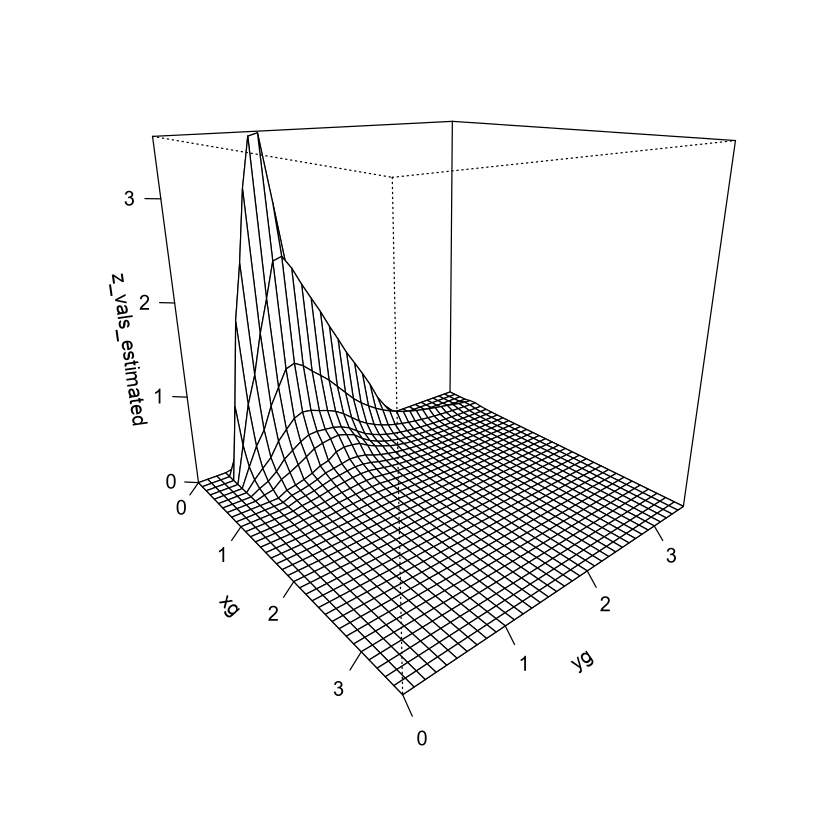

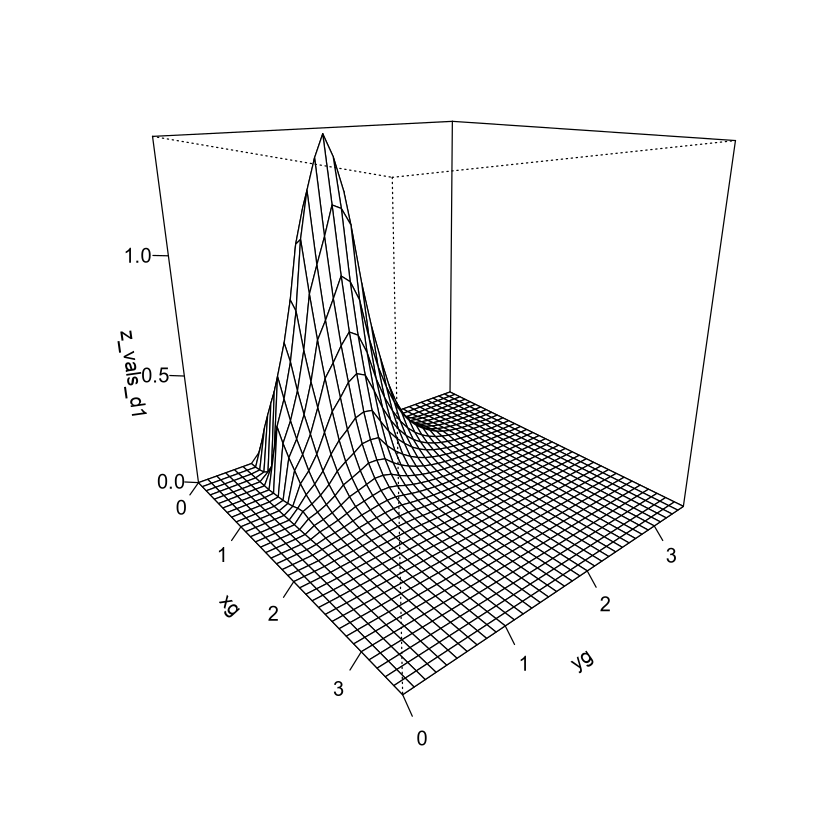

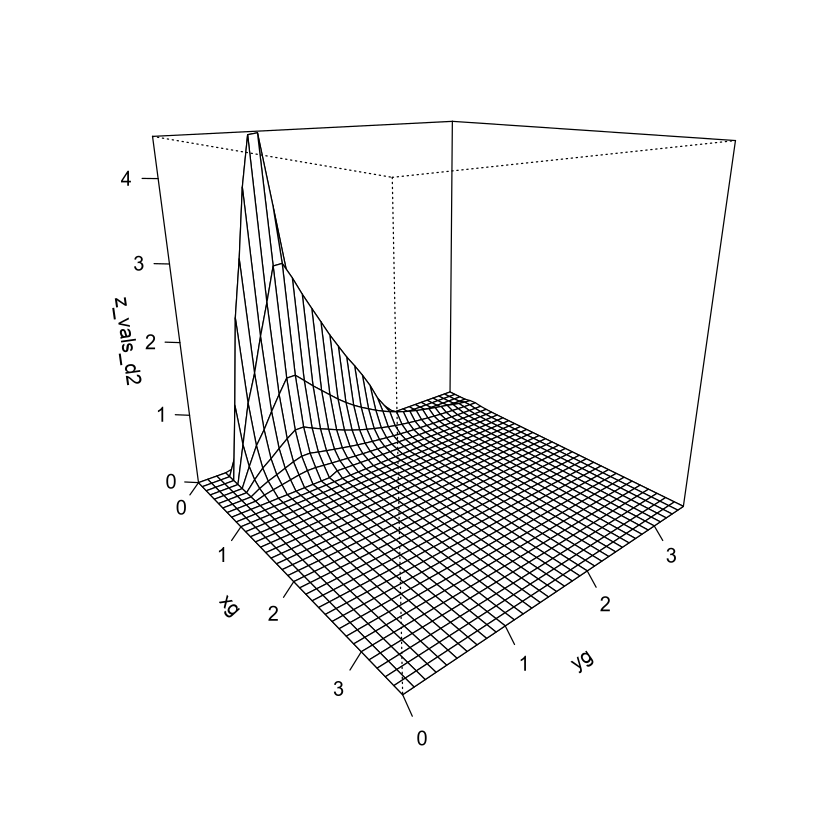

In [144]:
persp(xg, yg, z_vals_estimated, theta=50, phi=20, ticktype="detailed")
persp(xg, yg, z_vals_d1, theta=50, phi=20, ticktype="detailed")
persp(xg, yg, z_vals_d2, theta=50, phi=20, ticktype="detailed")


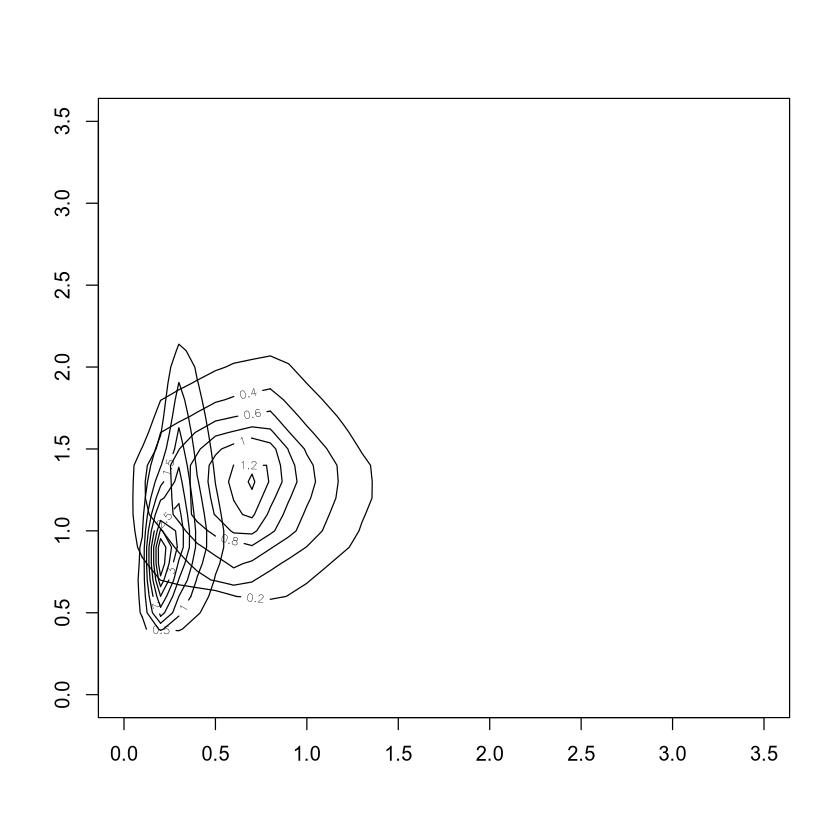

In [145]:
contour(xg, yg, z_vals_d1)
contour(xg, yg, z_vals_d2, add=TRUE)


In [146]:
# misclassified instances

prediction_lcic_g <- (em_output$theta_mat[,1] > 0.5)*1
prediction_lcic_l <- (em_output$theta_mat[,1] < 0.5)*1

prediction_hc_g <- (theta_mat_init_hc[,1] > 0.5)*1
prediction_hc_l <- (theta_mat_init_hc[,1] < 0.5)*1


In [147]:
print(sum(abs(targets_mat - prediction_lcic_g)))

print(sum(abs(targets_mat - prediction_lcic_l)))

print(sum(abs(targets_mat - prediction_hc_g)))

print(sum(abs(targets_mat - prediction_hc_l)))



[1] 134
[1] 435
[1] 223
[1] 346


In [73]:
em_output$cluster_densities[[2]]$mean_vec

[1] 0.2620174 0.7346562

In [41]:
em_output$theta_mat

1.0000000,0.00000000
1.0000000,0.00000000
1.0000000,0.00000000
0.8503847,0.14961533
1.0000000,0.00000000
0.4610234,0.53897660
0.7134841,0.28651592
1.0000000,0.00000000
0.4031843,0.59681571
1.0000000,0.00000000
0.6778770,0.32212297


In [59]:
targets_mat

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 [75] 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
[112] 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
[149] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
[186] 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
[223] 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
[334] 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
[371] 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[408] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
[445] 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
[482] 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
[519] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 1 1 1 1 1 1 0